In [0]:
# compress data
!rm -rf history/

In [0]:
from train import train

if __name__ == '__main__':
  train('./captchas', batch_size=512, learning_rate=0.001, epochs=100, model_dir='./model')


/content/train.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)
/content/train.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


/content/train.py:139: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=False)
/content/train.py:140: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, requires_grad=False)


(1200, 2)


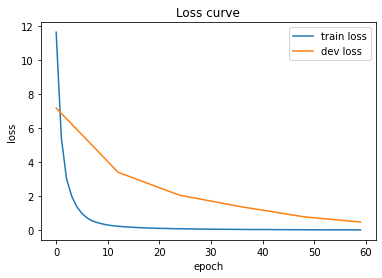

In [0]:
# plot
import json
import matplotlib.pyplot as plt
import numpy as np
import os

with open(os.path.join('./history', 'history_epoch_train.json'), mode='r') as in_fp:
  batch_his_train = json.load(in_fp)

with open(os.path.join('./history', 'history_epoch_dev.json'), mode=r'r') as in_fp:
  batch_his_dev = json.load(in_fp)

batch_his_train = np.array(batch_his_train)
batch_his_dev = np.array(batch_his_dev)
print(batch_his_dev.shape)
batch_his_dev = np.array([np.mean(batch_his_dev[i:i+12,:], axis=0) for i in range(100)])

batchs = list(range(batch_his_train.shape[0]))
plt.figure()
plt.title('Loss curve')
plt.plot(batchs[:60], batch_his_train[:60,0], label='train loss')
plt.plot(batchs[:60], batch_his_dev[:60,0], label='dev loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()
plt.savefig('./loss.svg')
plt.show()

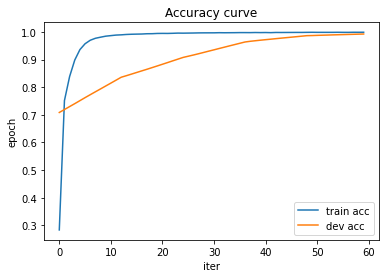

In [0]:
plt.figure()
plt.title('Accuracy curve')
plt.plot(batchs[:60], batch_his_train[:60,1], label='train acc')
plt.plot(batchs[:60], batch_his_dev[:60,1], label='dev acc')
plt.xlabel('iter')
plt.ylabel('epoch')

plt.legend()
plt.savefig('./acc.svg')
plt.show()